___
# __OCR NLP Project__
### Mercedes Wu
___

___
## __Getting OCR Receipt Data from: https://github.com/clovaai/cord__
- data is stored in json format with xy coordinates
- train size - 800 images
- test size - 100 images
- including some sample images in data folder
- data does not contain personal information
___

In [94]:
import nltk
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
from skimage import io

___
## __Data Exploration of Dataset__
- looking at a test image and it's respective json data to get a feel for the data
___

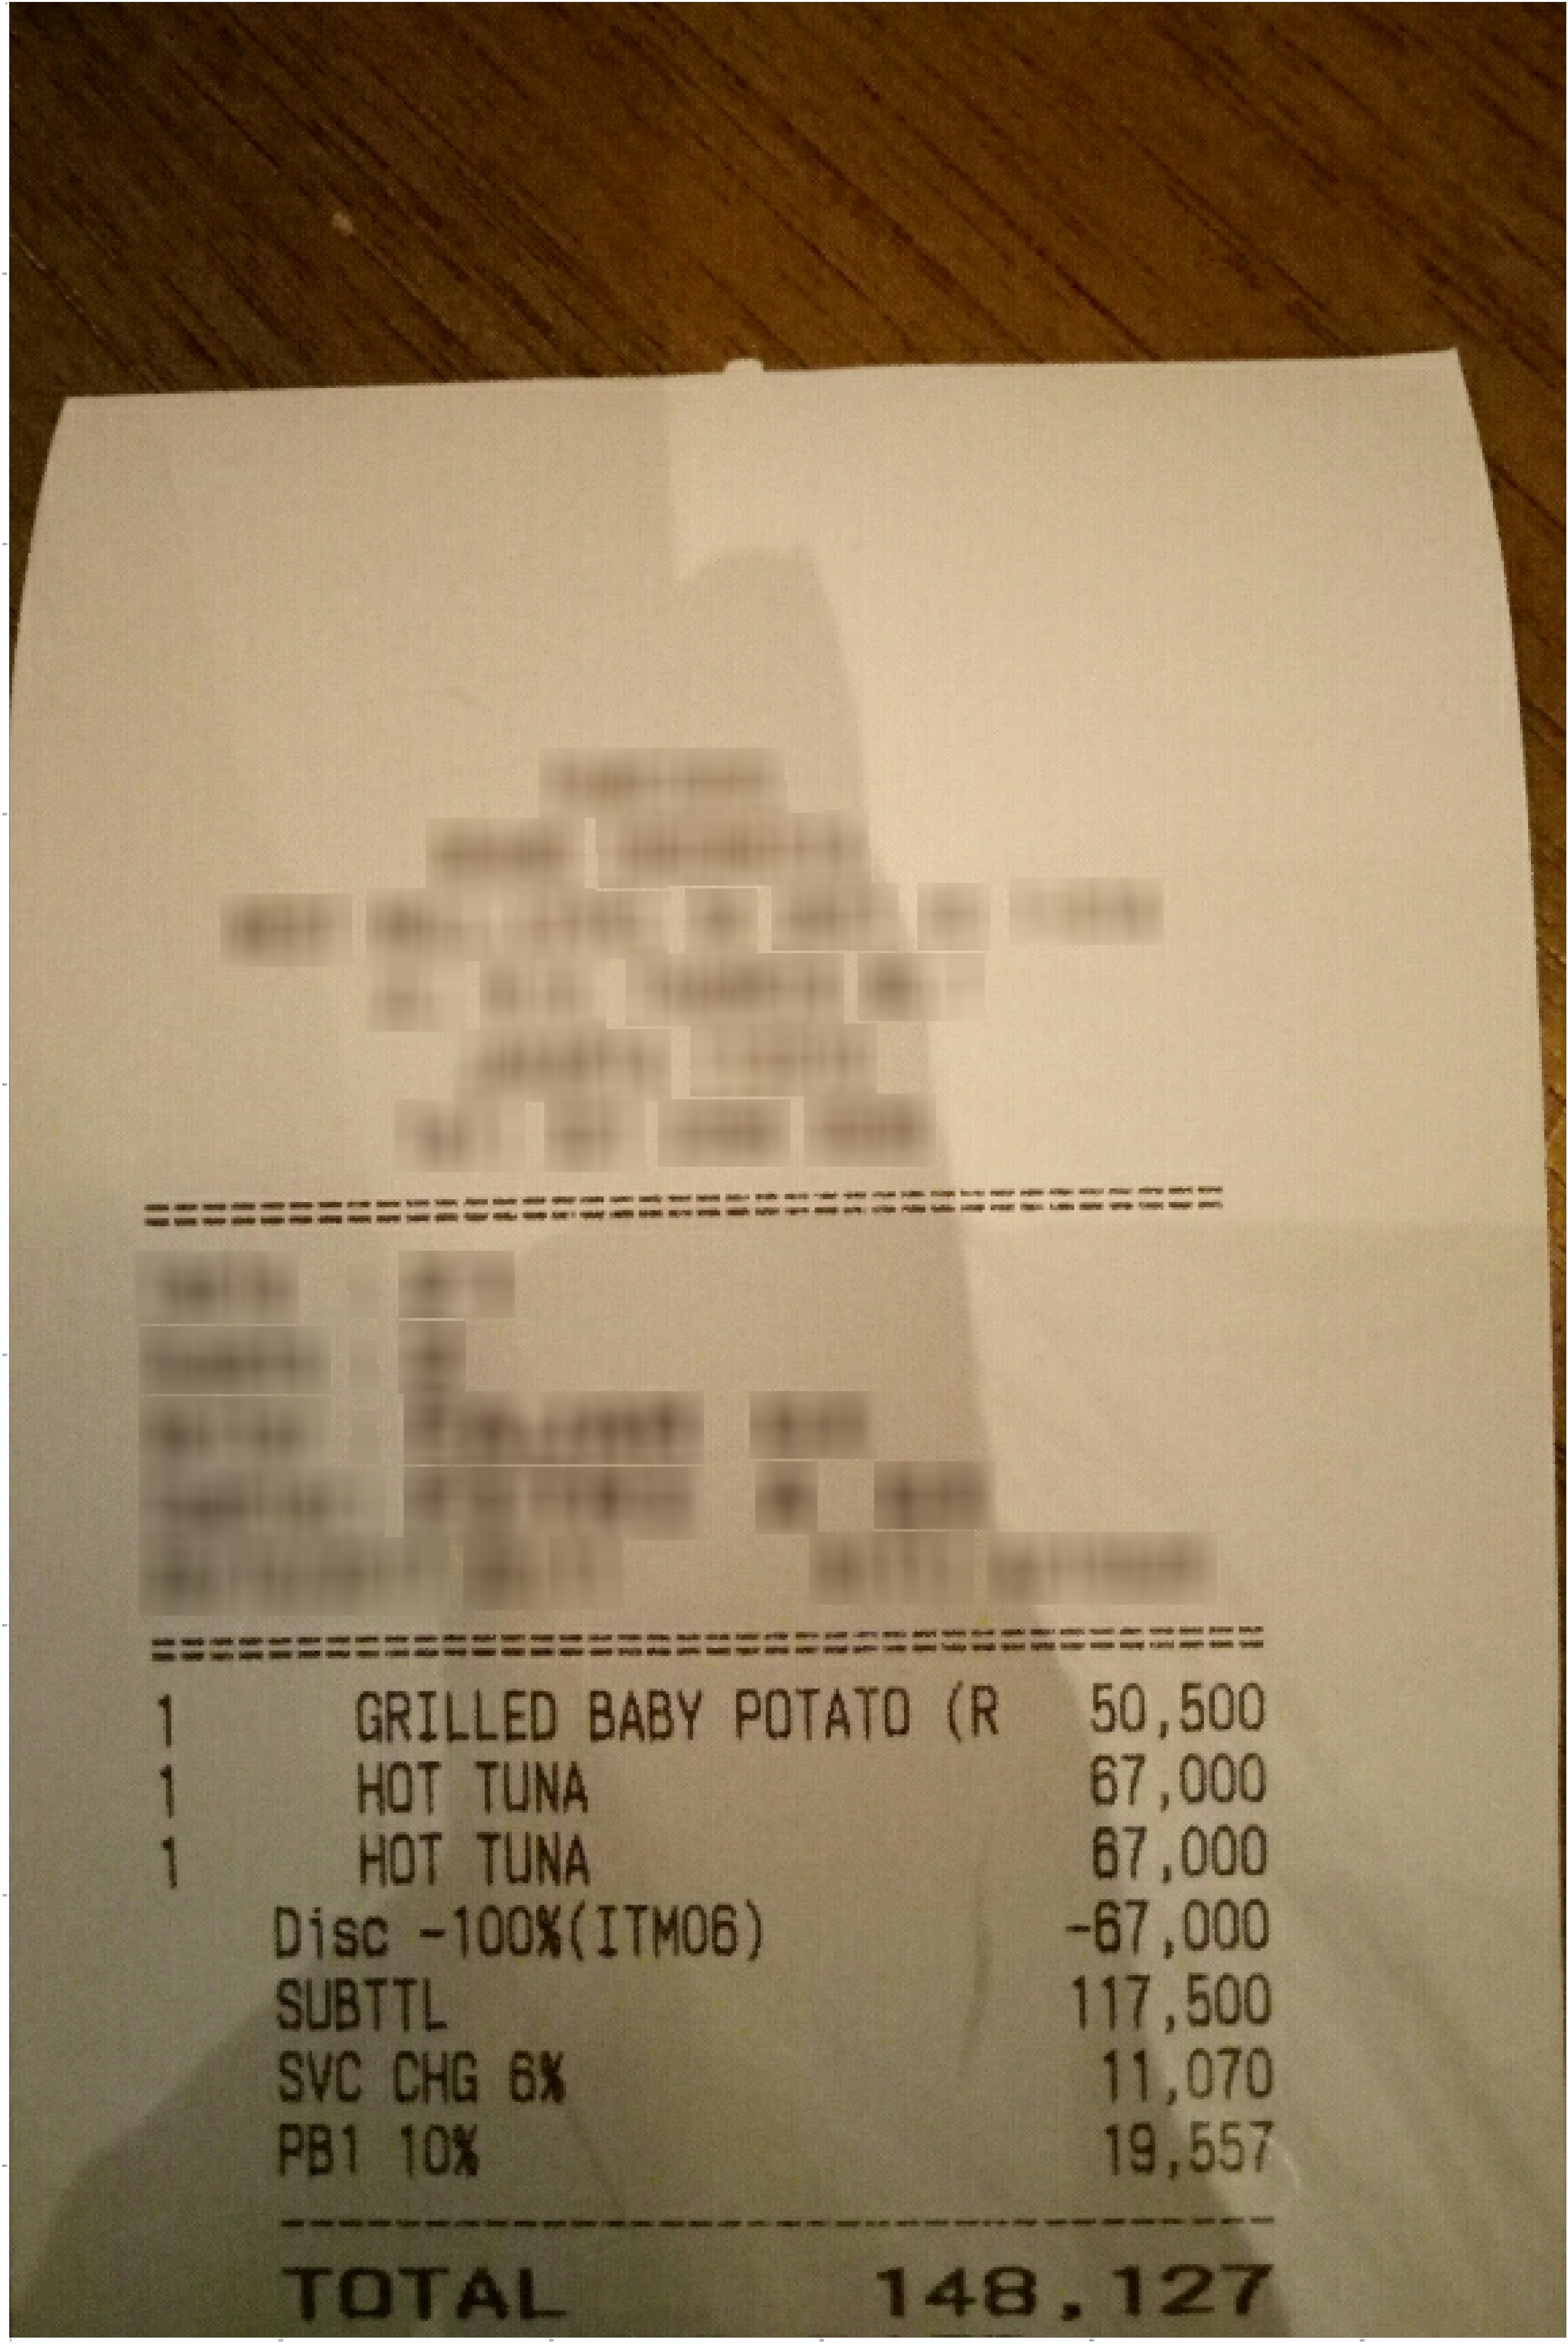

In [95]:
img = io.imread('./data/receipt_ocr/images/train/receipt_00797.png')
fig,ax = plt.subplots(figsize=(100,200))
ax = plt.imshow(img)


In [96]:
folder = './data/receipt_ocr/json/train/'
with open(f'{folder}receipt_00797.json') as f:
    d = json.load(f)

In [97]:
d.keys()

dict_keys(['dontcare', 'valid_line', 'meta', 'roi', 'repeating_symbol'])

In [98]:
d['valid_line'][0].keys()

dict_keys(['words', 'category', 'group_id'])

In [99]:
d['dontcare']

[]

In [100]:
d['meta']

{'version': 'v0.1',
 'split': 'train',
 'image_id': 797,
 'image_size': {'width': 576, 'height': 864}}

In [101]:
d['roi']

{'x2': 553,
 'y3': 883,
 'x3': 596,
 'y4': 916,
 'x1': 6,
 'y1': 132,
 'x4': 2,
 'y2': 113}

In [102]:
d['repeating_symbol']

[[{'quad': {'x2': 454,
    'y3': 455,
    'x3': 454,
    'y4': 459,
    'x1': 49,
    'y1': 438,
    'x4': 46,
    'y2': 432},
   'text': '='}],
 [{'quad': {'x2': 468,
    'y3': 616,
    'x3': 468,
    'y4': 622,
    'x1': 51,
    'y1': 600,
    'x4': 50,
    'y2': 595},
   'text': '='}],
 [{'quad': {'x2': 469,
    'y3': 831,
    'x3': 469,
    'y4': 830,
    'x1': 97,
    'y1': 811,
    'x4': 98,
    'y2': 810},
   'text': '-'}]]

In [103]:
d['valid_line'][0]['words']

[{'quad': {'x2': 64,
   'y3': 648,
   'x3': 64,
   'y4': 648,
   'x1': 54,
   'y1': 626,
   'x4': 54,
   'y2': 626},
  'is_key': 0,
  'row_id': 1847369,
  'text': '1'}]

In [104]:
d['valid_line'][1]['words']

[{'quad': {'x2': 206,
   'y3': 648,
   'x3': 206,
   'y4': 648,
   'x1': 124,
   'y1': 620,
   'x4': 124,
   'y2': 620},
  'is_key': 0,
  'row_id': 1847369,
  'text': 'GRILLED'},
 {'quad': {'x2': 260,
   'y3': 646,
   'x3': 260,
   'y4': 646,
   'x1': 210,
   'y1': 620,
   'x4': 210,
   'y2': 620},
  'is_key': 0,
  'row_id': 1847369,
  'text': 'BABY'},
 {'quad': {'x2': 336,
   'y3': 646,
   'x3': 336,
   'y4': 646,
   'x1': 264,
   'y1': 620,
   'x4': 264,
   'y2': 620},
  'is_key': 0,
  'row_id': 1847369,
  'text': 'POTATO'},
 {'quad': {'x2': 358,
   'y3': 647,
   'x3': 357,
   'y4': 646,
   'x1': 344,
   'y1': 618,
   'x4': 344,
   'y2': 617},
  'is_key': 0,
  'row_id': 1847369,
  'text': '('},
 {'quad': {'x2': 368,
   'y3': 645,
   'x3': 368,
   'y4': 646,
   'x1': 353,
   'y1': 621,
   'x4': 354,
   'y2': 619},
  'is_key': 0,
  'row_id': 1847369,
  'text': 'R'}]

In [105]:
d['valid_line'][0]['category']

'menu.cnt'

In [106]:
d['valid_line'][0]['group_id']

3

___
__notes so far__
- valid line gives the most useful information
- can ignore dont care, meta, and ROI for now but in real life data it might not be this simple
- quad gives boundry box of OCR scan
- category is the correct label for the ocr text, we can use this as a target
- group_id seems to be a numerical key of the category
- not sure what rowid refers to yet <br>

__ideas__
- would be nice to get this into a dataframe format
- can use the quad data to help group together certain items for the menu 
    - e.g. "1 Grilled Baby Potato (R"
- whether the text is a number or a string can also give us valuable information
- will probably need to use regex or heuristic based filtering to get rid of some noise 
    - e.g. "(R"
- repeating symbol would be useful to help segment image but for the sake of time/complexity we will ignore it for now
___

___
## __Creating a Training Dataset for Modeling__
- transforming json data in "valid_line" to dataframe
___

In [107]:
df['words'].iloc[0]

[{'quad': {'x2': 64,
   'y3': 648,
   'x3': 64,
   'y4': 648,
   'x1': 54,
   'y1': 626,
   'x4': 54,
   'y2': 626},
  'is_key': 0,
  'row_id': 1847369,
  'text': '1'}]

In [108]:
# after some initial testing, i cant find a super easy solution
df = pd.DataFrame.from_dict(d['valid_line'], orient='columns')
df

,words,category,group_id
0,"[{'quad': {'x2': 64, 'y3': 648, 'x3': 64, 'y4'...",menu.cnt,3
1,"[{'quad': {'x2': 206, 'y3': 648, 'x3': 206, 'y...",menu.nm,3
2,"[{'quad': {'x2': 468, 'y3': 644, 'x3': 468, 'y...",menu.price,3
3,"[{'quad': {'x2': 66, 'y3': 674, 'x3': 66, 'y4'...",menu.cnt,4
4,"[{'quad': {'x2': 164, 'y3': 674, 'x3': 164, 'y...",menu.nm,4
5,"[{'quad': {'x2': 468, 'y3': 672, 'x3': 468, 'y...",menu.price,4
6,"[{'quad': {'x2': 66, 'y3': 700, 'x3': 66, 'y4'...",menu.cnt,5
7,"[{'quad': {'x2': 164, 'y3': 700, 'x3': 164, 'y...",menu.nm,5
8,"[{'quad': {'x2': 470, 'y3': 698, 'x3': 470, 'y...",menu.price,5
9,"[{'quad': {'x2': 144, 'y3': 728, 'x3': 144, 'y...",menu.discountprice,5


In [109]:
# need to breakdown words column, going to use lambda function but there is most likely room for improvement
# first breaking down the quad to coordinate values
df['quad'] = df['words'].map(lambda x: x[0]['quad'])
df['x1'] = df['quad'].map(lambda x: x['x1'])
df['x2'] = df['quad'].map(lambda x: x['x2'])
df['x3'] = df['quad'].map(lambda x: x['x3'])
df['x4'] = df['quad'].map(lambda x: x['x4'])
df['y1'] = df['quad'].map(lambda x: x['y1'])
df['y2'] = df['quad'].map(lambda x: x['y2'])
df['y3'] = df['quad'].map(lambda x: x['y3'])
df['y4'] = df['quad'].map(lambda x: x['y4'])

In [110]:
# splitting out text to a column
df['text'] = df['words'].map(lambda x: x[0]['text'])
# splitting out iskey&rowid to get a better idea, might need to not use it as a feature to be fair though
df['row_id'] = df['words'].map(lambda x: x[0]['row_id'])
df['is_key'] = df['words'].map(lambda x: x[0]['is_key'])


In [111]:
df

,words,category,group_id,quad,x1,x2,x3,x4,y1,y2,y3,y4,text,row_id,is_key
0,"[{'quad': {'x2': 64, 'y3': 648, 'x3': 64, 'y4'...",menu.cnt,3,"{'x2': 64, 'y3': 648, 'x3': 64, 'y4': 648, 'x1...",54,64,64,54,626,626,648,648,1,1847369,0
1,"[{'quad': {'x2': 206, 'y3': 648, 'x3': 206, 'y...",menu.nm,3,"{'x2': 206, 'y3': 648, 'x3': 206, 'y4': 648, '...",124,206,206,124,620,620,648,648,GRILLED,1847369,0
2,"[{'quad': {'x2': 468, 'y3': 644, 'x3': 468, 'y...",menu.price,3,"{'x2': 468, 'y3': 644, 'x3': 468, 'y4': 644, '...",398,468,468,398,618,618,644,644,"50,500",1847369,0
3,"[{'quad': {'x2': 66, 'y3': 674, 'x3': 66, 'y4'...",menu.cnt,4,"{'x2': 66, 'y3': 674, 'x3': 66, 'y4': 674, 'x1...",54,66,66,54,652,652,674,674,1,1847370,0
4,"[{'quad': {'x2': 164, 'y3': 674, 'x3': 164, 'y...",menu.nm,4,"{'x2': 164, 'y3': 674, 'x3': 164, 'y4': 674, '...",124,164,164,124,648,648,674,674,HOT,1847370,0
5,"[{'quad': {'x2': 468, 'y3': 672, 'x3': 468, 'y...",menu.price,4,"{'x2': 468, 'y3': 672, 'x3': 468, 'y4': 672, '...",396,468,468,396,644,644,672,672,"67,000",1847370,0
6,"[{'quad': {'x2': 66, 'y3': 700, 'x3': 66, 'y4'...",menu.cnt,5,"{'x2': 66, 'y3': 700, 'x3': 66, 'y4': 700, 'x1...",54,66,66,54,678,678,700,700,1,1847371,0
7,"[{'quad': {'x2': 164, 'y3': 700, 'x3': 164, 'y...",menu.nm,5,"{'x2': 164, 'y3': 700, 'x3': 164, 'y4': 700, '...",126,164,164,126,674,674,700,700,HOT,1847371,0
8,"[{'quad': {'x2': 470, 'y3': 698, 'x3': 470, 'y...",menu.price,5,"{'x2': 470, 'y3': 698, 'x3': 470, 'y4': 698, '...",398,470,470,398,672,672,698,698,"67,000",1847371,0
9,"[{'quad': {'x2': 144, 'y3': 728, 'x3': 144, 'y...",menu.discountprice,5,"{'x2': 144, 'y3': 728, 'x3': 144, 'y4': 728, '...",94,144,144,94,702,702,728,728,Disc,1847372,1


In [113]:
df.columns

Index(['words', 'category', 'group_id', 'quad', 'x1', 'x2', 'x3', 'x4', 'y1',
       'y2', 'y3', 'y4', 'text', 'row_id', 'is_key'],
      dtype='object')

___
__notes__
- looks like rowid calculates based on the quad if the items are on the same line
- techniques for this include random sample consensus (RANSAC)
     - we should try implementing this but due to time constraints let's see the results of initial modeling techniques
___


In [114]:
# putting above code into a function to run over all the json images
def json_to_df_helper(d):
    df = pd.DataFrame.from_dict(d['valid_line'], orient='columns')
    # need to breakdown words column, going to use lambda function but there is most likely room for improvement
    # first breaking down the quad to coordinate values
    df['quad'] = df['words'].map(lambda x: x[0]['quad'])
    df['x1'] = df['quad'].map(lambda x: x['x1'])
    df['x2'] = df['quad'].map(lambda x: x['x2'])
    df['x3'] = df['quad'].map(lambda x: x['x3'])
    df['x4'] = df['quad'].map(lambda x: x['x4'])
    df['y1'] = df['quad'].map(lambda x: x['y1'])
    df['y2'] = df['quad'].map(lambda x: x['y2'])
    df['y3'] = df['quad'].map(lambda x: x['y3'])
    df['y4'] = df['quad'].map(lambda x: x['y4'])
    # splitting out text to a column
    df['text'] = df['words'].map(lambda x: x[0]['text'])
    # splitting out iskey&rowid to get a better idea, might need to not use it as a feature to be fair though
    df['row_id'] = df['words'].map(lambda x: x[0]['row_id'])
    df['is_key'] = df['words'].map(lambda x: x[0]['is_key'])
    
    # filtering down to training features
    return df[['x1', 'x2', 'x3', 'x4', 'y1', 'y2', 'y3', 'y4', 'text', 'row_id', 'is_key', 'category', 'group_id']]

In [120]:
dfs = []
path_to_jsonfiles = './data/receipt_ocr/json/train/'
for file in os.listdir(path_to_jsonfiles):
    full_filename = "%s/%s" % (path_to_jsonfiles, file)
    with open(full_filename,'r') as f:
        d = json.load(f)
    dfs.append(json_to_df_helper(d))


In [122]:
final_df = pd.concat(dfs, axis=0)

In [123]:
final_df

,x1,x2,x3,x4,y1,y2,y3,y4,text,row_id,is_key,category,group_id
0,256,270,270,256,374,374,390,390,x,2179893,0,menu.cnt,3
1,258,270,270,258,402,402,418,418,x,2179894,0,menu.cnt,4
2,258,272,272,258,428,428,444,444,x,2179895,0,menu.cnt,5
3,260,274,274,260,456,456,470,470,x,2179896,0,menu.cnt,6
4,258,274,274,258,480,480,496,496,x,2179897,0,menu.cnt,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,716,735,735,715,1323,1324,1382,1381,1,678298,0,menu.cnt,3
2,1000,1189,1189,1000,1319,1319,1388,1388,18.000,678298,0,menu.price,3
3,275,417,416,275,1469,1470,1536,1531,Total,678299,1,total.total_price,4
4,274,415,414,274,1616,1618,1685,1683,Tunai,678300,1,total.cashprice,4


In [ ]:
___
TODO:
- add some simple feature generation like:
    - length string
    - is it a str, int, float
    - some ranges that items would cost
        - unlikely to find an item > $10,000 dollars
Note:
- looks like the reciepts can be from different countries, need to account for the fact that some countries use , to separate out change

___
## __Modeling__
- is this a supervised machine learning problem?
    - i.e. we can leverage past labeled data for inferencing?
    - this way we can utlize techniques that take advangtage of the labeled dataset
- is this a unsupervised machine learning problem?
    - can utilize:
        - business logic
        - positional and linguistic cues
        - some heuristics on receipts to group unlabeled data 
___